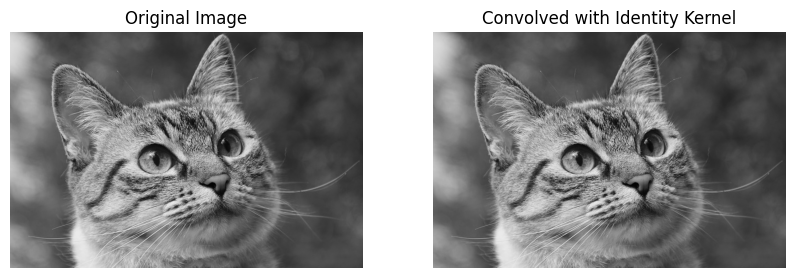

In [26]:
# Task 1: Identity Kernel Convolution

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os


img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
if img1 is None:
    print("Error: Image not found. Please check the path for img1.jpg")
else:

    identity_kernel = np.array([[0, 0, 0],
                                [0, 1, 0],
                                [0, 0, 0]], dtype=np.float32)
    #3x3 identity kernel/filter it has a center value of 1
    #image unchanged when convulution

    # Apply convolution using cv2.filter2D
    convolved_img1 = cv2.filter2D(img1, -1, identity_kernel)

    # Display the original and convolved images side-by-side.
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(convolved_img1, cmap='gray')
    plt.title("Convolved with Identity Kernel")
    plt.axis('off')

    plt.show()

    # Define the output directory and filename
    output_dir = 'output_images'
    output_filename = 'convolved_img1.jpg'
    output_path = os.path.join(output_dir, output_filename)

    # Create the directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the convolved image
    cv2.imwrite(output_path, convolved_img1)
#Explanation:
#identity kernel does not chnage ir alter the image so the output looks exactly identical as the input image


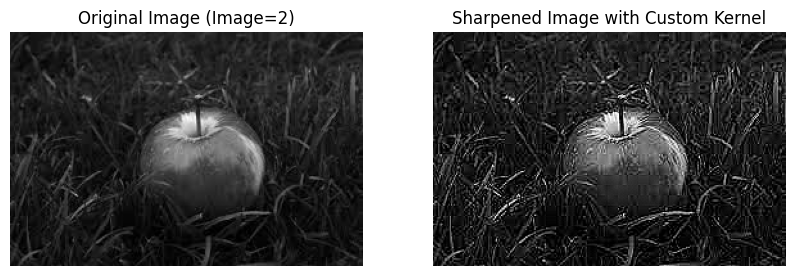

In [27]:
# Task2: Sharpening Kernel Convolution

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os



img2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
if img2 is None:
    print("Error: Image not found. Please check the path for img2.jpg")
else:

    sharpening_kernel = np.array([[0, -1, 0],
                                  [-1, 5, -1],
                                  [0, -1, 0]], dtype=np.float32)
    # 3x3 sharpening kernel
    # kernel emphasizes differences between a pixel and its neighbors.
    # central value 5 increases the brightness of the current pixel
    # surrounding -1 values subtract the neighbors highlighting edges.
    # Apply convolution using cv2.filter2D
    convolved_img2 = cv2.filter2D(img2, -1, sharpening_kernel)
    # convolved_img2 = cv2.filter2D(convolved_img2,-1,sharpening_kernel)

    # Display the original and sharpened images side-by-side.
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img2, cmap='gray')
    plt.title("Original Image (Image=2)")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(convolved_img2, cmap='gray')
    plt.title("Sharpened Image with Custom Kernel")
    plt.axis('off')

    plt.show()
    output_dir = 'output_images'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    output_path = os.path.join(output_dir, 'convolvedsh_img2.jpg')
    cv2.imwrite(output_path, convolved_img2)



#Explanation:
#sharpening kernel enhances edges by increasing the contrast between the center pixel and its neighbors
#makes image looks more clearer and more defined effectively the opposite effect of blurring.


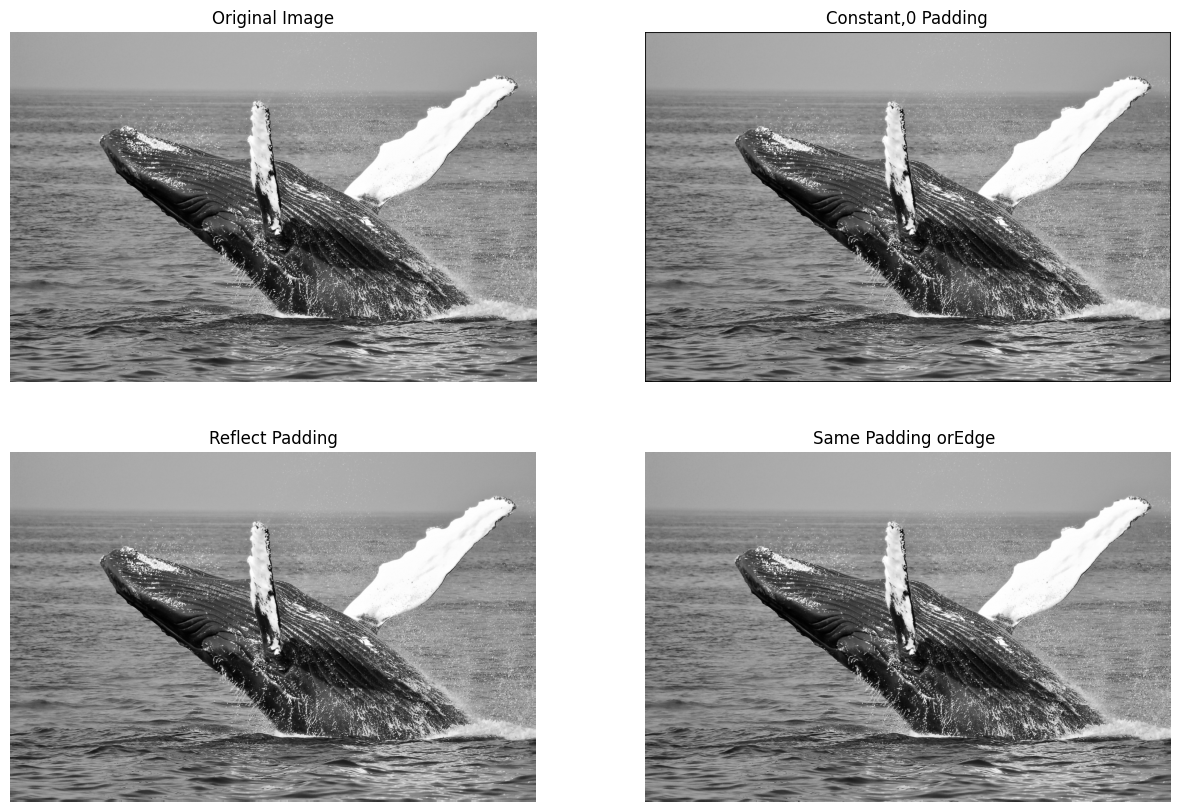

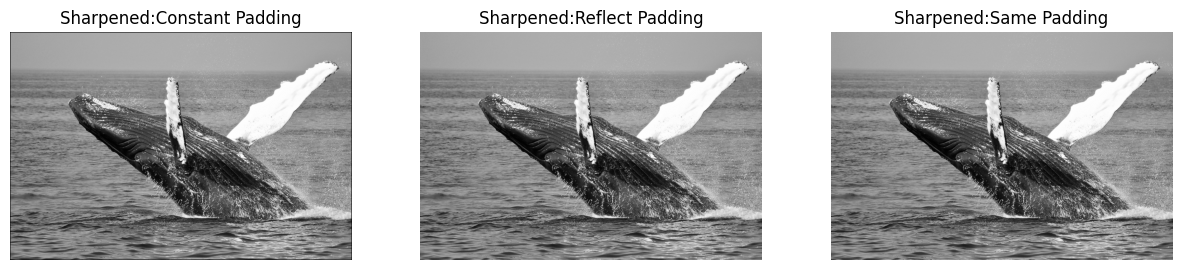

In [28]:
#Task3: Padding effect on Convolution

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os



img3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
if img3 is None:
    print("Error: Unable to load img3.jpg. Please check the file path.")
    exit()

#sharpening kernel enhances edges by amplifying the center pixel and subtracting its neighbors
sharpening_kernel = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]], dtype=np.float32)

#padding width
pad_width = 5

#Constant Padding Zero-padding:
#Pads the image with zeros on all sides.
padded_constant = np.pad(img3, pad_width, mode='constant', constant_values=0)
# padded_constant = np.pad(padded_constant, pad_width, mode='constant', constant_values=0)

#Reflect Padding:
# Pads the image with a reflection of the image itself.
padded_reflect = np.pad(img3, pad_width, mode='reflect')

#Same Padding:
padded_same = np.pad(img3, pad_width, mode='edge')

# Sharpening Kernel Using Convolution

#use cv2.filter2D to apply the kernel to each padded image.

sharpened_constant = cv2.filter2D(padded_constant, -1, sharpening_kernel)
sharpened_reflect  = cv2.filter2D(padded_reflect, -1, sharpening_kernel)
sharpened_same     = cv2.filter2D(padded_same, -1, sharpening_kernel)


output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save the images to the output directory
cv2.imwrite(os.path.join(output_dir, 'padded_constant_img3.jpg'), padded_constant)
cv2.imwrite(os.path.join(output_dir, 'padded_reflect_img3.jpg'), padded_reflect)
cv2.imwrite(os.path.join(output_dir, 'padded_same_img3.jpg'), padded_same)
cv2.imwrite(os.path.join(output_dir, 'sharpened_constant_img3.jpg'), sharpened_constant)
cv2.imwrite(os.path.join(output_dir, 'sharpened_reflect_img3.jpg'), sharpened_reflect)
cv2.imwrite(os.path.join(output_dir, 'sharpened_same_img3.jpg'), sharpened_same)

# Display the original and padded images
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img3, cmap='gray', vmin=0, vmax=255)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(padded_constant, cmap='gray', vmin=0, vmax=255)
plt.title("Constant,0 Padding")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(padded_reflect, cmap='gray', vmin=0, vmax=255)
plt.title("Reflect Padding")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(padded_same, cmap='gray', vmin=0, vmax=255)
plt.title("Same Padding orEdge ")
plt.axis('off')

plt.show()

# Display the sharpened images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(sharpened_constant, cmap='gray', vmin=0, vmax=255)
plt.title("Sharpened:Constant Padding")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_reflect, cmap='gray', vmin=0, vmax=255)
plt.title("Sharpened:Reflect Padding")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sharpened_same, cmap='gray', vmin=0, vmax=255)
plt.title("Sharpened:Same Padding")
plt.axis('off')

plt.show()


# Explanation:
#constant padding pads the image with zeros which shows a dark border that affects the convolution.
# reflect padding mirrors the border of the image, often leading to smoother transitions at the edges.
#same padding simulated here with edge padding replicates the border pixels to keep the output size similar
#to the input thereby preserving the overall brightness near the borders.


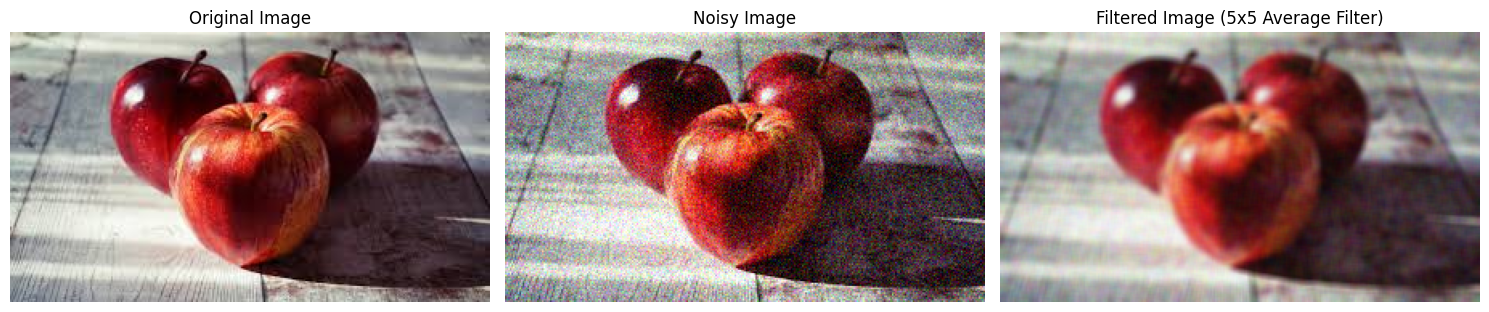

True

In [35]:
#Task4 add Gaussian noise to an image

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def add_gaussian_noise(image, mean=0, sigma=25):

    # mean
    # sigma (float): Std dev of gaussian noise
    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), gaussian_noise)
    # clip the values to stay within valid range
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

image_path = 'img5.jpg'
clear_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if clear_image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

# Convert from BGR (OpenCV default) to RGB for display
clear_image_rgb = cv2.cvtColor(clear_image, cv2.COLOR_BGR2RGB)

# Add Gaussian noise
noisy_image = add_gaussian_noise(clear_image_rgb)
# Apply a 5x5 average filter
filtered_image = cv2.blur(noisy_image, (5, 5))
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(clear_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(filtered_image)
plt.title('Filtered Image (5x5 Average Filter)')
plt.axis('off')

plt.tight_layout()
plt.show()
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
cv2.imwrite(os.path.join(output_dir, 'noisy_image_img4.jpg'), noisy_image)
cv2.imwrite(os.path.join(output_dir, 'filtered_image_img4.jpg'), filtered_image)
# here Gaussian noise to that image and subsequently reducing that noise using a 5x5 average filter
#adding Gaussian noise it  simulate common real-world imperfections such as sensor noise
#Applying the average filter helps to smooth out these random variations
#thereby reducing the noise and improving the visual quality of the image.

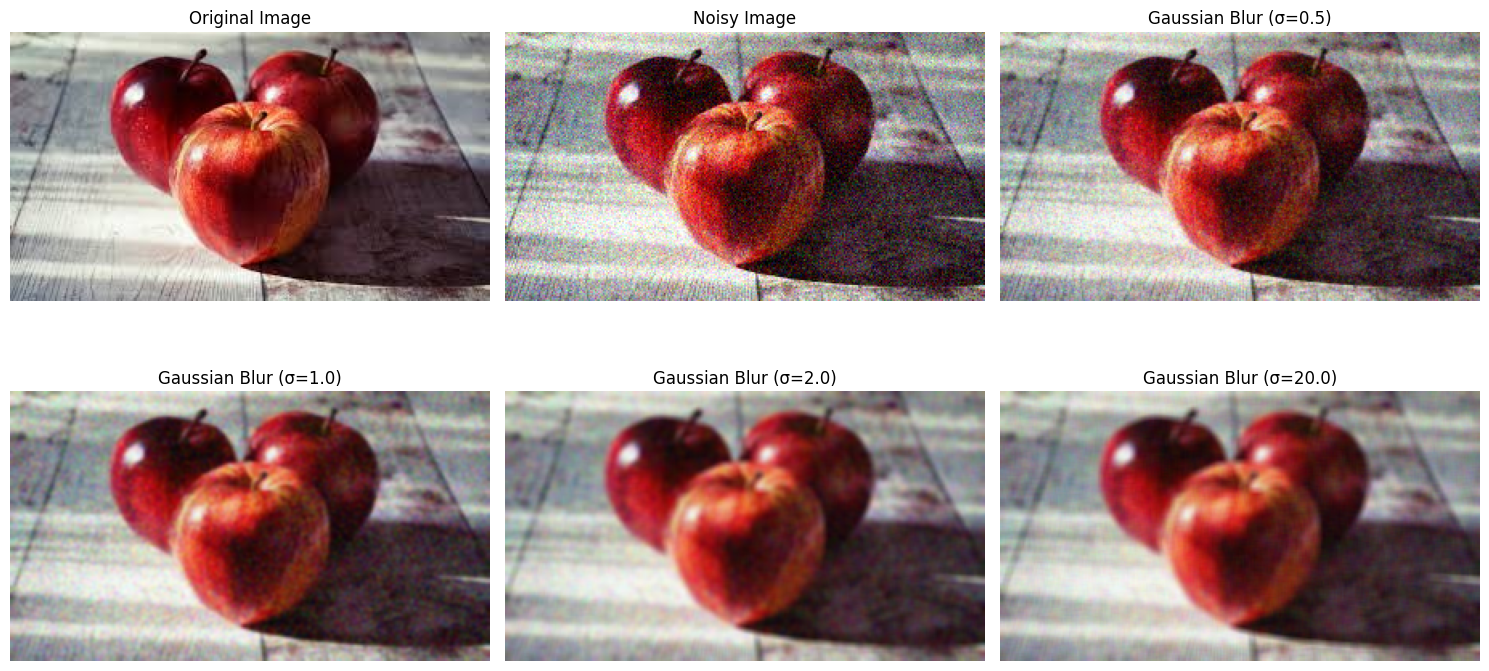

In [30]:
# Task5 Gaussian noisemsigma chnage

import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_gaussian_noise(image, mean=0, sigma=25):

    gaussian_noise = np.random.normal(mean, sigma, image.shape).astype(np.float32)
    noisy_image = cv2.add(image.astype(np.float32), gaussian_noise)
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

image_path = 'img5.jpg'
clear_image = cv2.imread(image_path, cv2.IMREAD_COLOR)
if clear_image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

clear_image_rgb = cv2.cvtColor(clear_image, cv2.COLOR_BGR2RGB)

noisy_image = add_gaussian_noise(clear_image_rgb)

sigma_values = [0.5, 1.0, 2.0, 20.0]

output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cv2.imwrite(os.path.join(output_dir, 'noisy_imageimg5.jpg'), cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))

plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.imshow(clear_image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

for i, sigma in enumerate(sigma_values, start=3):
    blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), sigmaX=sigma)
    cv2.imwrite(os.path.join(output_dir, f'blurred_image_sigma_{sigma}img5.jpg'), cv2.cvtColor(blurred_image, cv2.COLOR_RGB2BGR))
    # Plot the blurred image
    plt.subplot(2, 3, i)
    plt.imshow(blurred_image)
    plt.title(f'Gaussian Blur (σ={sigma})')
    plt.axis('off')

plt.tight_layout()
plt.show()

#Applying a Gaussian blur to a noisy image using a 5x5 kernel with varying standard deviations (sigma values)
#helps in reducing noise and smoothing the image Lower sigma values result in minimal smoothing- preserve more details
# higher sigma values increase the smoothing effect- lead to a loss of finer details

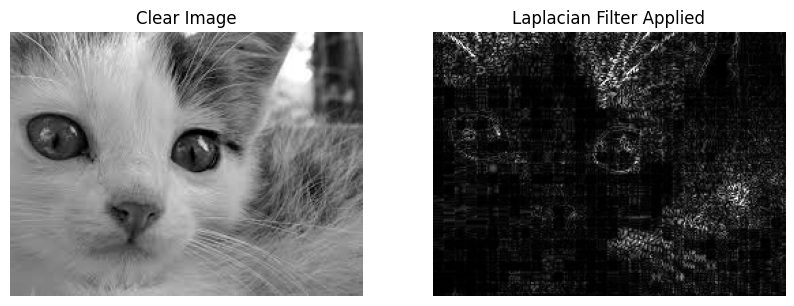

True

In [31]:
#Task6
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'img6.jpg'  # Update with your image path
clear_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if clear_image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

# Apply the Laplacian filter
laplacian_filtered_image = cv2.Laplacian(clear_image, cv2.CV_64F)
# Convert the result to 8-bit unsigned integer
laplacian_filtered_image = cv2.convertScaleAbs(laplacian_filtered_image)

# Plotting the original and filtered images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(clear_image, cmap='gray')
plt.title('Clear Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(laplacian_filtered_image, cmap='gray')
plt.title('Laplacian Filter Applied')
plt.axis('off')

plt.show()
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

cv2.imwrite(os.path.join(output_dir, 'laplacian_filtered_image_img6.jpg'), laplacian_filtered_image)
# Explaination
#Laplacian filter highlights regions of rapid intensity change
# effectively detecting edges in the image.



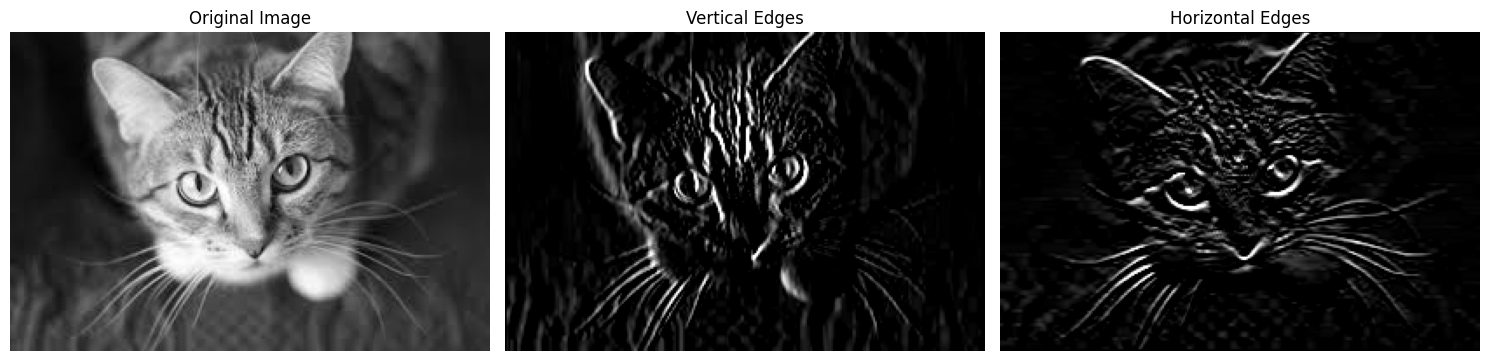

True

In [32]:
#Task7
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'img7.jpg'  # Update with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

#vertical edge detection kernel
vertical_kernel = np.array([[-1, 0, 1],
                            [-1, 0, 1],
                            [-1, 0, 1]], dtype=np.float32)

#horizontal edge detection kernel
horizontal_kernel = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

vertical_edges = cv2.filter2D(image, -1, vertical_kernel)
horizontal_edges = cv2.filter2D(image, -1, horizontal_kernel)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(vertical_edges, cmap='gray')
plt.title('Vertical Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.tight_layout()
plt.show()
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
cv2.imwrite(os.path.join(output_dir, 'vertical_edges_img7.jpg'), vertical_edges)
cv2.imwrite(os.path.join(output_dir, 'horizontal_edges_img7.jpg'), horizontal_edges)

# The vertical kernel detects edges where there are significant changes in intensity in the vertical direction,
# highlighting vertical features. Conversely, the horizontal kernel detects edges with significant horizontal
# intensity changes, emphasizing horizontal features.


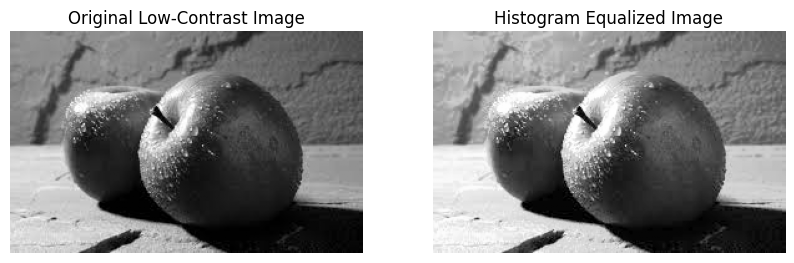

True

In [33]:
#Task8
import cv2
import matplotlib.pyplot as plt

# Load a low-contrast grayscale image (Image=7)
image_path = 'img8.jpg'  # Update with your image path
low_contrast_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if low_contrast_image is None:
    raise FileNotFoundError(f"Image not found at the path: {image_path}")

# Apply Histogram Equalization
equalized_image = cv2.equalizeHist(low_contrast_image)

# Plotting the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title('Original Low-Contrast Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')

plt.show()
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
cv2.imwrite(os.path.join(output_dir, 'equalized_image_img8.jpg'), equalized_image)
# Explanation:
#Histogram equalization effectively enhances the contrast of the original low-contrast image by spreading out the intensity values, making details more distinguishable.

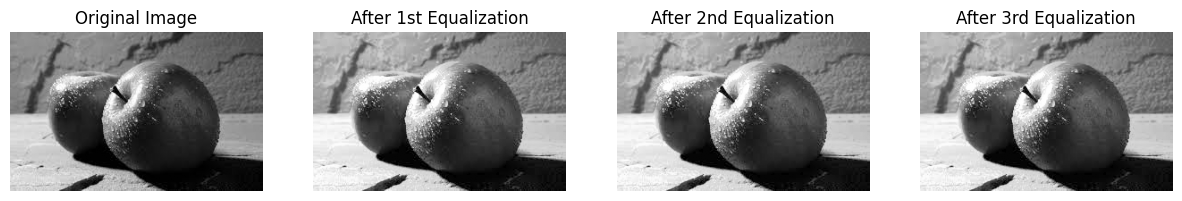

True

In [34]:
#Task9
# Histogram Equalization multiple times
first_equalization = cv2.equalizeHist(low_contrast_image)
second_equalization = cv2.equalizeHist(first_equalization)
third_equalization = cv2.equalizeHist(second_equalization)

# Plotting the images
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(low_contrast_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(first_equalization, cmap='gray')
plt.title('After 1st Equalization')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(second_equalization, cmap='gray')
plt.title('After 2nd Equalization')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(third_equalization, cmap='gray')
plt.title('After 3rd Equalization')
plt.axis('off')

plt.show()
output_dir = 'output_images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
cv2.imwrite(os.path.join(output_dir, 'first_equalization_img8.jpg'), first_equalization)
cv2.imwrite(os.path.join(output_dir, 'second_equalization_img8.jpg'), second_equalization)
cv2.imwrite(os.path.join(output_dir, 'third_equalization_img8.jpg'), third_equalization)

#Explanation:
#Applying histogram equalization multiple times does not significantly change the image after the first application.
#This is because the first equalization already distributes the intensity values uniformly
#and subsequent applications have little to no effect, potentially leading to diminishing returns or minor artifacts.